# Logistic Regression

### Reading the dataset

In [1]:
from warnings import filterwarnings
filterwarnings('ignore')

In [2]:
import pandas as pd
df = pd.read_csv('iris.csv')
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [4]:
df['species'].unique()

array(['setosa', 'versicolor', 'virginica'], dtype=object)

In [5]:
df['species'].value_counts()

species
setosa        50
versicolor    50
virginica     50
Name: count, dtype: int64

<Axes: xlabel='species'>

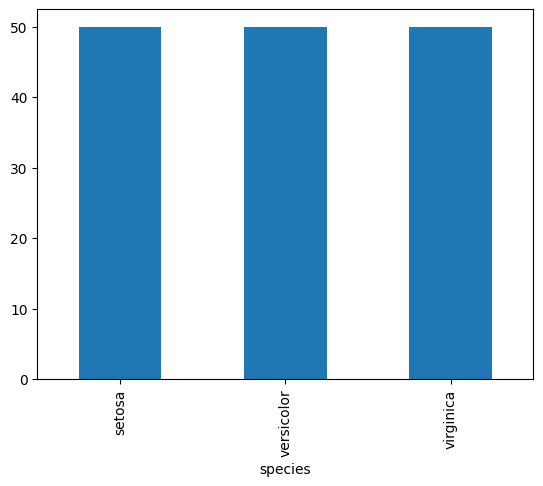

In [6]:
df['species'].value_counts().plot(kind='bar')

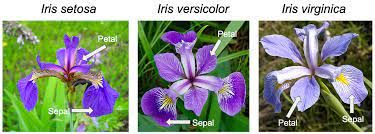

### Label Encode the target feature Species

In [7]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df['species']=le.fit_transform(df['species'])
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [8]:
df['species'].unique()

array([0, 1, 2])

### Seperate X and Y

In [9]:
X = df.drop(labels=['species'],axis=1)
Y = df[['species']]

In [10]:
X.head()

,sepal_length,sepal_width,petal_length,petal_width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [11]:
Y.head()

,species
0,0
1,0
2,0
3,0
4,0


### Sklearn preprocessing

In [12]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer

In [13]:
# Numeric Pipeline
num_pipe = Pipeline(steps=[('imputer',SimpleImputer(strategy='mean')),
                           ('scaler',StandardScaler())])

In [14]:
X_pre = num_pipe.fit_transform(X)
X_pre

array([[-9.00681170e-01,  1.01900435e+00, -1.34022653e+00,
        -1.31544430e+00],
       [-1.14301691e+00, -1.31979479e-01, -1.34022653e+00,
        -1.31544430e+00],
       [-1.38535265e+00,  3.28414053e-01, -1.39706395e+00,
        -1.31544430e+00],
       [-1.50652052e+00,  9.82172869e-02, -1.28338910e+00,
        -1.31544430e+00],
       [-1.02184904e+00,  1.24920112e+00, -1.34022653e+00,
        -1.31544430e+00],
       [-5.37177559e-01,  1.93979142e+00, -1.16971425e+00,
        -1.05217993e+00],
       [-1.50652052e+00,  7.88807586e-01, -1.34022653e+00,
        -1.18381211e+00],
       [-1.02184904e+00,  7.88807586e-01, -1.28338910e+00,
        -1.31544430e+00],
       [-1.74885626e+00, -3.62176246e-01, -1.34022653e+00,
        -1.31544430e+00],
       [-1.14301691e+00,  9.82172869e-02, -1.28338910e+00,
        -1.44707648e+00],
       [-5.37177559e-01,  1.47939788e+00, -1.28338910e+00,
        -1.31544430e+00],
       [-1.26418478e+00,  7.88807586e-01, -1.22655167e+00,
      

In [16]:
cols = num_pipe.get_feature_names_out()
cols

array(['sepal_length', 'sepal_width', 'petal_length', 'petal_width'],
      dtype=object)

In [17]:
X_pre = pd.DataFrame(X_pre,columns=cols)
X_pre

,sepal_length,sepal_width,petal_length,petal_width
0,-0.900681,1.019004,-1.340227,-1.315444
1,-1.143017,-0.131979,-1.340227,-1.315444
2,-1.385353,0.328414,-1.397064,-1.315444
3,-1.506521,0.098217,-1.283389,-1.315444
4,-1.021849,1.249201,-1.340227,-1.315444
...,...,...,...,...
145,1.038005,-0.131979,0.819596,1.448832
146,0.553333,-1.282963,0.705921,0.922303
147,0.795669,-0.131979,0.819596,1.053935
148,0.432165,0.788808,0.933271,1.448832


### Train test split

In [18]:
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest = train_test_split(X_pre,Y,test_size=0.3,random_state=21)

In [19]:
xtrain.shape

(105, 4)

In [20]:
xtest.shape

(45, 4)

### Building Logistic Regression Model

In [21]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
model.fit(xtrain,ytrain)

LogisticRegression()

### Predict the training and test data

In [22]:
ypred_tr = model.predict(xtrain)
ypred_ts = model.predict(xtest)

In [23]:
ypred_tr[0:5]

array([0, 0, 0, 1, 0])

In [24]:
ytrain.head()

,species
36,0
37,0
13,0
68,1
11,0


In [25]:
ypred_ts[0:5]

array([1, 0, 0, 0, 1])

In [26]:
ytest.head()

,species
92,1
44,0
7,0
21,0
95,1


### Evaluate the model

In [27]:
from sklearn.metrics import accuracy_score
tr_acc = accuracy_score(ytrain,ypred_tr)
ts_acc = accuracy_score(ytest,ypred_ts)

In [28]:
tr_acc

0.9809523809523809

In [29]:
ts_acc

0.9333333333333333

In [30]:
model.score(xtrain,ytrain)

0.9809523809523809

In [31]:
model.score(xtest,ytest)

0.9333333333333333

### Coef and intercept of model

In [32]:
model.intercept_

array([-0.15404784,  1.80154733, -1.64749949])

In [33]:
model.coef_

array([[-0.9381932 ,  1.23288534, -1.64397352, -1.61647068],
       [ 0.43328776, -0.46377466, -0.46127358, -0.57545279],
       [ 0.50490544, -0.76911068,  2.1052471 ,  2.19192347]])

In [34]:
model.predict_proba(xtest)

array([[1.99614283e-02, 9.22569458e-01, 5.74691142e-02],
       [9.89276377e-01, 1.07229373e-02, 6.85548083e-07],
       [9.75191131e-01, 2.48083084e-02, 5.60839370e-07],
       [9.87905918e-01, 1.20936196e-02, 4.62802853e-07],
       [9.11309016e-02, 8.55476845e-01, 5.33922531e-02],
       [1.31892231e-02, 8.31210552e-01, 1.55600225e-01],
       [9.46458121e-01, 5.35402014e-02, 1.67764891e-06],
       [2.58147411e-03, 2.14750645e-01, 7.82667881e-01],
       [9.65447644e-01, 3.45504834e-02, 1.87263810e-06],
       [9.92828775e-01, 7.17104685e-03, 1.77702652e-07],
       [2.50440616e-02, 9.54189993e-01, 2.07659450e-02],
       [9.82210373e-02, 8.37325521e-01, 6.44534419e-02],
       [6.57676486e-05, 2.48955948e-02, 9.75038638e-01],
       [6.55805056e-05, 1.58759244e-02, 9.84058495e-01],
       [9.28844551e-01, 7.11484983e-02, 6.95048331e-06],
       [2.52469387e-03, 4.24200587e-01, 5.73274720e-01],
       [7.96083638e-03, 4.19034354e-01, 5.73004809e-01],
       [1.52960069e-02, 8.53129

In [35]:
ypred_ts

array([1, 0, 0, 0, 1, 1, 0, 2, 0, 0, 1, 1, 2, 2, 0, 2, 2, 1, 0, 2, 2, 1,
       2, 1, 0, 1, 0, 0, 1, 2, 0, 2, 2, 0, 2, 1, 1, 2, 0, 2, 2, 2, 2, 1,
       2])

### Visualize confusion matrix

In [37]:
from sklearn.metrics import confusion_matrix
cf = confusion_matrix(ytest,ypred_ts)
cf

array([[14,  0,  0],
       [ 0, 13,  3],
       [ 0,  0, 15]], dtype=int64)

<Axes: >

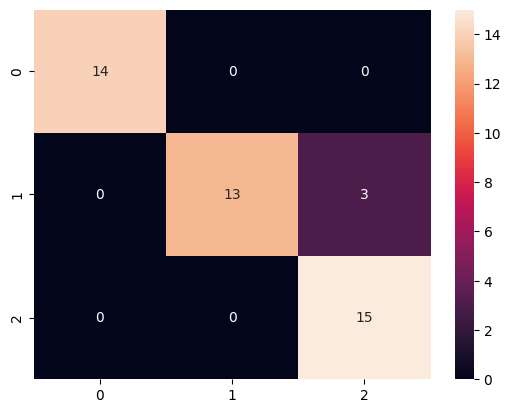

In [38]:
import seaborn as sns
sns.heatmap(cf,annot=True,fmt='d')

### Print the classification report

In [39]:
from sklearn.metrics import classification_report
print(classification_report(ytest,ypred_ts))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        14
           1       1.00      0.81      0.90        16
           2       0.83      1.00      0.91        15

    accuracy                           0.93        45
   macro avg       0.94      0.94      0.94        45
weighted avg       0.94      0.93      0.93        45



In [40]:
ypred_tr

array([0, 0, 0, 1, 0, 1, 0, 1, 2, 1, 1, 0, 0, 2, 0, 0, 0, 0, 0, 1, 1, 0,
       2, 1, 0, 0, 1, 1, 0, 2, 1, 2, 0, 2, 0, 0, 1, 2, 1, 1, 0, 2, 1, 0,
       2, 1, 1, 2, 1, 2, 1, 2, 2, 0, 0, 2, 2, 0, 1, 2, 1, 1, 2, 1, 2, 0,
       2, 2, 0, 0, 1, 2, 0, 0, 1, 2, 0, 0, 1, 2, 2, 0, 2, 1, 0, 1, 2, 1,
       0, 1, 2, 1, 1, 2, 2, 2, 1, 2, 1, 1, 2, 2, 0, 0, 1])

In [42]:
ypred_tr_sp = le.inverse_transform(ypred_tr)
ypred_tr_sp

array(['setosa', 'setosa', 'setosa', 'versicolor', 'setosa', 'versicolor',
       'setosa', 'versicolor', 'virginica', 'versicolor', 'versicolor',
       'setosa', 'setosa', 'virginica', 'setosa', 'setosa', 'setosa',
       'setosa', 'setosa', 'versicolor', 'versicolor', 'setosa',
       'virginica', 'versicolor', 'setosa', 'setosa', 'versicolor',
       'versicolor', 'setosa', 'virginica', 'versicolor', 'virginica',
       'setosa', 'virginica', 'setosa', 'setosa', 'versicolor',
       'virginica', 'versicolor', 'versicolor', 'setosa', 'virginica',
       'versicolor', 'setosa', 'virginica', 'versicolor', 'versicolor',
       'virginica', 'versicolor', 'virginica', 'versicolor', 'virginica',
       'virginica', 'setosa', 'setosa', 'virginica', 'virginica',
       'setosa', 'versicolor', 'virginica', 'versicolor', 'versicolor',
       'virginica', 'versicolor', 'virginica', 'setosa', 'virginica',
       'virginica', 'setosa', 'setosa', 'versicolor', 'virginica',
       'setosa', 'setos

In [44]:
ypred_ts_sp = le.inverse_transform(ypred_ts)
ypred_ts_sp

array(['versicolor', 'setosa', 'setosa', 'setosa', 'versicolor',
       'versicolor', 'setosa', 'virginica', 'setosa', 'setosa',
       'versicolor', 'versicolor', 'virginica', 'virginica', 'setosa',
       'virginica', 'virginica', 'versicolor', 'setosa', 'virginica',
       'virginica', 'versicolor', 'virginica', 'versicolor', 'setosa',
       'versicolor', 'setosa', 'setosa', 'versicolor', 'virginica',
       'setosa', 'virginica', 'virginica', 'setosa', 'virginica',
       'versicolor', 'versicolor', 'virginica', 'setosa', 'virginica',
       'virginica', 'virginica', 'virginica', 'versicolor', 'virginica'],
      dtype=object)